In [25]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

In [1]:
#Fear&Greed Index
fear_greed=pd.read_csv('~/Desktop/Seminar/fear&greed.csv',names=['FG_index'])[4:640].reset_index(drop=True)
fear_greed['date']=fear_greed['FG_index'].apply(lambda x: x.split(',')[0])
fear_greed['index']=fear_greed['FG_index'].apply(lambda x: x.split(',')[1])
fear_greed['cat']=fear_greed['FG_index'].apply(lambda x: x.split(',')[2])
from datetime import datetime
fear_greed['Time']=fear_greed['date'].apply(lambda x: datetime.strptime(x,'%m-%d-%Y'))
fear_greed=fear_greed.sort_values(['Time']).reset_index(drop=True)
fear_greed=fear_greed[['Time','index']]
fear_greed=fear_greed.set_index(fear_greed.columns[0])
ts_fg=pd.concat([fear_greed.shift(6),fear_greed.shift(5),fear_greed.shift(4),fear_greed.shift(3),fear_greed.shift(2),fear_greed.shift(1)], axis=1)
ts_fg.columns = ['fg-6','fg-5','fg-4','fg-3','fg-2','fg-1']
ts_fg=ts_fg.dropna(axis=0)
ts_fg

,fg-6,fg-5,fg-4,fg-3,fg-2,fg-1
Time,,,,,,
2018-02-07,30,15,40,24,11,8
2018-02-08,15,40,24,11,8,36
2018-02-09,40,24,11,8,36,30
2018-02-10,24,11,8,36,30,44
2018-02-11,11,8,36,30,44,54
...,...,...,...,...,...,...
2019-10-26,37,37,39,33,20,24
2019-10-27,37,39,33,20,24,53
2019-10-28,39,33,20,24,53,50


In [2]:
#match time frame
ts_fg=ts_fg[:-4]

In [3]:
#Google trends data- interest index
web=pd.concat([pd.read_csv('~/Desktop/Seminar/web1.csv',names=['Time','interest'])[2:],pd.read_csv('~/Desktop/Seminar/web2.csv',names=['Time','interest'])[2:],pd.read_csv('~/Desktop/Seminar/web3.csv',names=['Time','interest'])[2:]],axis=0)
web['Time']=web['Time'].apply(lambda x: datetime.strptime(str(x),'%Y-%m-%d'))
web=web.set_index(web.columns[0])
ts_web=pd.concat([web.shift(6),web.shift(5),web.shift(4),web.shift(3),web.shift(2),web.shift(1)], axis=1)
ts_web.columns = ['i-6','i-5','i-4','i-3','i-2','i-1']
ts_web=ts_web.dropna(axis=0)
ts_web

,i-6,i-5,i-4,i-3,i-2,i-1
Time,,,,,,
2018-02-07,61,79,52,45,79,100
2018-02-08,79,52,45,79,100,63
2018-02-09,52,45,79,100,63,51
2018-02-10,45,79,100,63,51,47
2018-02-11,79,100,63,51,47,38
...,...,...,...,...,...,...
2019-10-22,23,23,23,20,20,22
2019-10-23,23,23,20,20,22,22
2019-10-24,23,20,20,22,22,28


In [19]:
#Historic Price
price=pd.read_csv('~/Desktop/Seminar/Price.csv').dropna(axis=1)
price['Time']=price['Time'].apply(lambda x: x.split(' ')[0])
price['Time']=price['Time'].apply(lambda x: datetime.strptime(str(x),'%Y-%m-%d'))
price['mean_price']= price.mean(axis=1)
price=price[price.Time>='2018-02-01'][['Time','mean_price']]
price=price.set_index(price.columns[0])
ts_price=pd.concat([price.shift(7),price.shift(6),price.shift(5),price.shift(4),price.shift(3),price.shift(2),price.shift(1), price], axis=1)
ts_price.columns = ['p-7','p-6','p-5','p-4','p-3','p-2','p-1', 'p']
ts_price=ts_price.dropna(axis=0)
ts_price

,p-7,p-6,p-5,p-4,p-3,p-2,p-1,p
Time,,,,,,,,
2018-02-08,9657.066894,8700.150190,9073.001244,8890.164571,7773.884853,6921.755880,7982.890388,8294.445370
2018-02-09,8700.150190,9073.001244,8890.164571,7773.884853,6921.755880,7982.890388,8294.445370,8329.057359
2018-02-10,9073.001244,8890.164571,7773.884853,6921.755880,7982.890388,8294.445370,8329.057359,8693.505587
2018-02-11,8890.164571,7773.884853,6921.755880,7982.890388,8294.445370,8329.057359,8693.505587,8263.095691
2018-02-12,7773.884853,6921.755880,7982.890388,8294.445370,8329.057359,8693.505587,8263.095691,8659.540519
...,...,...,...,...,...,...,...,...
2019-10-25,8009.182576,8012.460721,8070.932751,8264.551731,8240.623085,7792.322461,7506.401902,7942.124459
2019-10-26,8012.460721,8070.932751,8264.551731,8240.623085,7792.322461,7506.401902,7942.124459,9345.416825
2019-10-27,8070.932751,8264.551731,8240.623085,7792.322461,7506.401902,7942.124459,9345.416825,9424.368709


In [21]:
#Convert to return
ts_price['r-1']=(ts_price['p-1']-ts_price['p-2'])/ts_price['p-2']
ts_price['r-2']=(ts_price['p-2']-ts_price['p-3'])/ts_price['p-3']
ts_price['r-3']=(ts_price['p-3']-ts_price['p-4'])/ts_price['p-4']
ts_price['r-4']=(ts_price['p-4']-ts_price['p-5'])/ts_price['p-5']
ts_price['r-5']=(ts_price['p-5']-ts_price['p-6'])/ts_price['p-6']
ts_price['r-6']=(ts_price['p-6']-ts_price['p-7'])/ts_price['p-7']
ts_return=ts_price[ts_price.columns[-7:]]
ts_return

,p,r-1,r-2,r-3,r-4,r-5,r-6
Time,,,,,,,
2018-02-08,8294.445370,0.153304,-0.109614,-0.125563,-0.020152,0.042856,-0.099090
2018-02-09,8329.057359,0.039028,0.153304,-0.109614,-0.125563,-0.020152,0.042856
2018-02-10,8693.505587,0.004173,0.039028,0.153304,-0.109614,-0.125563,-0.020152
2018-02-11,8263.095691,0.043756,0.004173,0.039028,0.153304,-0.109614,-0.125563
2018-02-12,8659.540519,-0.049509,0.043756,0.004173,0.039028,0.153304,-0.109614
...,...,...,...,...,...,...,...
2019-10-25,7942.124459,-0.036693,-0.054401,-0.002895,0.023990,0.007298,0.000409
2019-10-26,9345.416825,0.058047,-0.036693,-0.054401,-0.002895,0.023990,0.007298
2019-10-27,9424.368709,0.176690,0.058047,-0.036693,-0.054401,-0.002895,0.023990


In [11]:
#Trade Vol
vol=pd.read_csv('~/Desktop/Seminar/tradevol.csv').dropna(axis=1)
vol['Time']=vol['Time'].apply(lambda x: x.split(' ')[0])
vol['Time']=vol['Time'].apply(lambda x: datetime.strptime(str(x),'%Y-%m-%d'))
vol['mean_vol']= vol.mean(axis=1)
vol=vol[vol.Time>='2018-02-01'][['Time','mean_vol']]
vol=vol.set_index(vol.columns[0])
ts_vol=pd.concat([vol.shift(6),vol.shift(5),vol.shift(4),vol.shift(3),vol.shift(2),vol.shift(1)], axis=1)
ts_vol.columns = ['v-6','v-5','v-4','v-3','v-2','v-1']
ts_vol=ts_vol.dropna(axis=0)
ts_vol

,v-6,v-5,v-4,v-3,v-2,v-1
Time,,,,,,
2018-02-07,34336.567561,51800.143543,22193.144584,25737.559306,52430.991262,76258.367333
2018-02-08,51800.143543,22193.144584,25737.559306,52430.991262,76258.367333,42827.999199
2018-02-09,22193.144584,25737.559306,52430.991262,76258.367333,42827.999199,30253.979935
2018-02-10,25737.559306,52430.991262,76258.367333,42827.999199,30253.979935,25277.380376
2018-02-11,52430.991262,76258.367333,42827.999199,30253.979935,25277.380376,24753.231091
...,...,...,...,...,...,...
2019-10-25,5550.768354,5964.801111,5637.174736,5174.024907,12300.366878,5805.614235
2019-10-26,5964.801111,5637.174736,5174.024907,12300.366878,5805.614235,15754.047287
2019-10-27,5637.174736,5174.024907,12300.366878,5805.614235,15754.047287,25950.993562


In [22]:
#Merge
df=ts_fg.join(ts_web,on='Time').join(ts_return,on='Time').join(ts_vol,on='Time')
df_clean=df.dropna()

In [100]:
df_clean

,fg-6,fg-5,fg-4,fg-3,fg-2,fg-1,i-6,i-5,i-4,i-3,...,r-3,r-4,r-5,r-6,v-6,v-5,v-4,v-3,v-2,v-1
Time,,,,,,,,,,,,,,,,,,,,,
2018-02-08,15,40,24,11,8,36,79,52,45,79,...,-0.125563,-0.020152,0.042856,-0.099090,51800.143543,22193.144584,25737.559306,52430.991262,76258.367333,42827.999199
2018-02-09,40,24,11,8,36,30,52,45,79,100,...,-0.109614,-0.125563,-0.020152,0.042856,22193.144584,25737.559306,52430.991262,76258.367333,42827.999199,30253.979935
2018-02-10,24,11,8,36,30,44,45,79,100,63,...,0.153304,-0.109614,-0.125563,-0.020152,25737.559306,52430.991262,76258.367333,42827.999199,30253.979935,25277.380376
2018-02-11,11,8,36,30,44,54,79,100,63,51,...,0.039028,0.153304,-0.109614,-0.125563,52430.991262,76258.367333,42827.999199,30253.979935,25277.380376,24753.231091
2018-02-12,8,36,30,44,54,31,100,63,51,47,...,0.004173,0.039028,0.153304,-0.109614,76258.367333,42827.999199,30253.979935,25277.380376,24753.231091,19247.020688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-22,40,40,40,41,37,37,23,23,23,20,...,0.000409,-0.008103,-0.003375,-0.024216,8519.044224,6996.605635,7173.244321,5550.768354,5964.801111,5637.174736
2019-10-23,40,40,41,37,37,39,23,23,20,20,...,0.007298,0.000409,-0.008103,-0.003375,6996.605635,7173.244321,5550.768354,5964.801111,5637.174736,5174.024907
2019-10-24,40,41,37,37,39,33,23,20,20,22,...,0.023990,0.007298,0.000409,-0.008103,7173.244321,5550.768354,5964.801111,5637.174736,5174.024907,12300.366878


Text(0.5, 1, 'Feature Correlation')

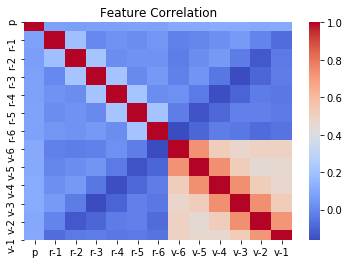

In [102]:
#Correlation
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_clean.corr(),cmap='coolwarm')
plt.title('Feature Correlation')

In [23]:
#Split to training data and label
X=df_clean.drop('p',axis=1)
y=df_clean['p']

In [28]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
#Baseline: Linear
lr=LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
r2_score(y_test, pred_lr)

0.11791149321661754

In [34]:
#RF default
rf = RandomForestRegressor()
rf.fit(X_train, y_train)  
print(rf.feature_importances_)
pred_rf=rf.predict(X_test)
r2_score(y_test, pred_rf)

[0.06244488 0.06709674 0.06471594 0.03208801 0.08085838 0.05978372
 0.1277427  0.10672376 0.02139197 0.03924787 0.06979927 0.03217798
 0.0228998  0.01251234 0.01146555 0.01904753 0.01306609 0.01577487
 0.04602726 0.01609135 0.01624677 0.03068376 0.01678084 0.01533263]


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.5452542827001992

In [91]:
rf = RandomForestRegressor(max_depth=8,n_estimators=90,bootstrap=True)
rf.fit(X_train, y_train)  
print(rf.feature_importances_)
pred_rf=rf.predict(X_test)
r2_score(y_test, pred_rf)
#true_y=pd.DataFrame(y_test).reset_index(drop=False)
#pd.concat([true_y,pd.DataFrame(pred_rf)],axis=1)

[0.10372827 0.08493014 0.0351829  0.03481908 0.06264131 0.05119115
 0.07441005 0.06750206 0.05014891 0.04865567 0.0585632  0.05952633
 0.02007718 0.01910569 0.01574555 0.01464153 0.01430223 0.01249889
 0.04595358 0.02720277 0.02824287 0.02829236 0.02244012 0.02019817]


0.59975610448757

In [43]:
explained_variance_score(y_test, pred_rf)

0.6103208796930399

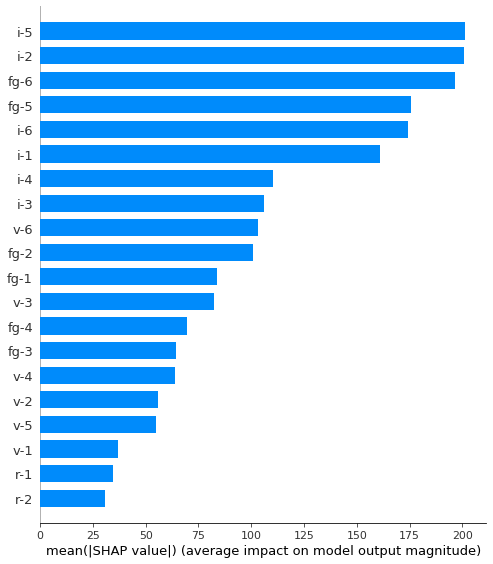

In [92]:
import shap
shap_values = shap.TreeExplainer(rf).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [94]:
shap.initjs()
explainer = shap.TreeExplainer(rf)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

In [89]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Maximum number of levels in tree
max_depth = [1,2,3,4,5,6,7,8,9,10]
max_depth.append(None)

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth}
print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]}


In [90]:
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=101, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
rf_random.best_params_


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   25.4s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 90, 'max_depth': 8}

In [ ]:
#Param Tuning
from hyperopt import hp
from hyperopt import STATUS_OK
from timeit import default_timer as timer
from hyperopt import tpe
from hyperopt import Trials
from hyperopt import fmin
#Objective
def objective(params):
    params = {
        'max_depth': int(params['max_depth']),
        'min_samples_split': int(params['min_samples_split']),
        'min_samples_leaf': int(params['min_samples_leaf']),
        'n_estimators': int(params['n_estimators'])
    }
    
    rf_model = RandomForestRegressor(**params)

    
    # Extract the best score
    score = cross_val_score(rf_model, X_train, y_train, scoring='r2', cv=StratifiedKFold()).mean()
    
    
    # Dictionary with information for evaluation
    print("Gini {:.3f} params {}".format(score, params))
    return score

#Domain Space

space = {
    'max_depth' : hp.quniform('max_depth', 2, 15, 1) ,
    'min_samples_split': hp.quniform('min_samples_split', 50, 350, 10),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 50, 150, 10),
    'n_estimators':hp.quniform('n_estimators', 10,100, 10)
}



# Trials object to track progress
bayes_trials = Trials()

# Run optimization
best = fmin(fn = objective, space = space, algo = tpe.suggest, 
            max_evals = 100, trials = bayes_trials, rstate = np.random.RandomState(101))

print("Hyperopt estimated optimum {}".format(best))


In [47]:
#XGB 
xgb = ensemble.GradientBoostingRegressor()
xgb.fit(X_train, y_train)
pred_xgb=xgb.predict(X_test)
r2_score(y_test, pred_xgb)

0.47670120887741907

In [63]:
xgb = ensemble.GradientBoostingRegressor(max_depth=8,n_estimators=500,learning_rate=0.01)
xgb.fit(X_train, y_train)
pred_xgb=xgb.predict(X_test)
r2_score(y_test, pred_xgb)

0.5311501463574964

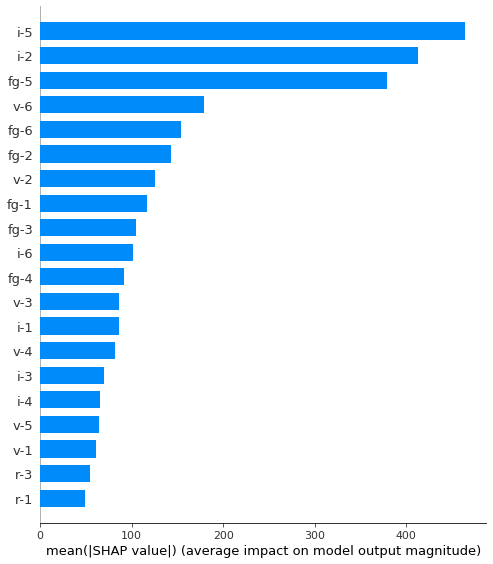

In [64]:
shap_values = shap.TreeExplainer(xgb).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")